###Part B: Customer Churn Prediction
####1. Overview
Customer churn, or customer attrition, refers to when a customer ceases their relationship
with a company or service provider. In today's highly competitive business environment,
retaining customers is a critical factor for long-term success. Predicting customer churn can
help organizations take proactive steps to retain customers, thus minimizing revenue loss.
This project aims to build a machine learning model that can predict whether a customer will
churn based on their demographic, account, and service-related data.
####2. Problem Statement
The goal of this project is to develop a classification model that predicts whether a customer
will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
with information about the services they use (such as internet service, phone service, and
online security), we will attempt to build a model that helps the company identify customers
who are at a high risk of churning.
By predicting customer churn, the company can proactively design retention strategies to
keep these customers, thereby improving customer satisfaction and reducing financial loss.

####3. Dataset Information
Dataset: [Customer_data]('https://docs.google.com/spreadsheets/d/1rnBO9F9xdSUY-WpeOJilMxMRZT-hwwWq6O98OHreY0k/edit?gid=1602415961#gid=1602415961')
* The dataset information can be found in this doc [Data_Information]('https://docs.google.com/document/d/1V-L3EdEnEEiYHhxppRY_CkPRbJ77ELYc/edit?tab=t.0')

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data uploading
url = 'https://docs.google.com/spreadsheets/d/1rnBO9F9xdSUY-WpeOJilMxMRZT-hwwWq6O98OHreY0k/export?format=csv&gid=1602415961'
df = pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# summary of statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
print("Duplicate Values:", df.duplicated().sum())
print("Missing Values:")
df.isnull().sum()

Duplicate Values: 0
Missing Values:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Here we see that the TotalCharges has 11 missing values. Let's check this rows.

In [ ]:
df[pd.isnull(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty. Let's see if there are any other 0 values in the tenure column.

In [ ]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
df[df['TotalCharges'].isnull()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column. Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [ ]:
# Drop rows where tenure is 0
df = df[df['tenure'] != 0]
df[df['tenure']==0].index

Index([], dtype='int64')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Print all unique values of the object data types in the dataset
for column in df.select_dtypes(exclude='number'):
  print(column,'\n----------')
  print(df[column].unique())
  print('x' * 40)

customerID 
----------
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
gender 
----------
['Female' 'Male']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Partner 
----------
['Yes' 'No']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Dependents 
----------
['No' 'Yes']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
PhoneService 
----------
['No' 'Yes']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
MultipleLines 
----------
['No phone service' 'No' 'Yes']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
InternetService 
----------
['DSL' 'Fiber optic' 'No']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
OnlineSecurity 
----------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
OnlineBackup 
----------
['Yes' 'No' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
DeviceProtection 
----------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
TechSupport 
----------
['No' 'Yes' 'No

####Data Visualization

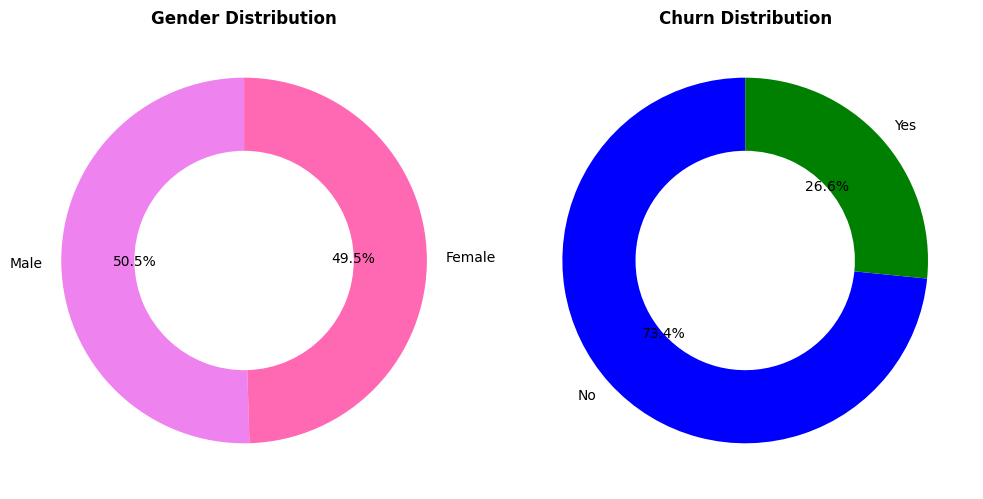

In [ ]:
label = ['gender','Churn']
colors = [['violet','hotpink'],['blue','green']]
titles = ['Gender Distribution', 'Churn Distribution']

# plot
plt.figure(figsize=(10,5))
for i, col in enumerate(label):
  plt.subplot(1,2,i+1)
  counts = df[col].value_counts()
  plt.pie(counts,labels= counts.index, autopct='%1.1f%%',startangle=90,
          wedgeprops = dict(width=0.4), colors=colors[i])
  plt.title(titles[i], fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
churn_gender = df.groupby(['gender','Churn']).size().unstack()
churn_gender

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


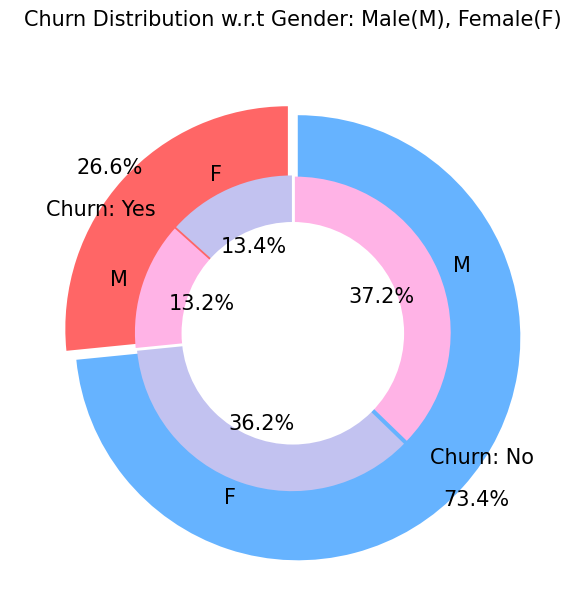

In [ ]:
# Set the overall figure size
plt.figure(figsize=(6,6))
# Outer ring data churns
labels=["Churn: Yes","Churn: No"]
values=[1869,5163]
colors=['#ff6666', '#66b3ff']
explode = (0.3, 0.3)

# Inner ring data (Gender split within Churn)
labels_gender=["F", "M", "F", "M"]
value_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_g = (0.1,0.1, 0.1, 0.1)
# Text styling for both pies
textprops = {"fontsize": 15}

# Outer pie (Churn Yes/No)
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8, colors=colors,
       startangle=90, frame=True, explode=explode, radius=10, textprops=textprops, counterclock=True)

# Inner pie (Gender inside each Churn group)
plt.pie(value_gender, labels=labels_gender, autopct='%1.1f%%', colors=colors_gender,explode=explode_g,
       startangle=90,radius=7, textprops=textprops, counterclock=True)

# Add a white circle in the center to make it a donut
center_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add chart title
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
# Ensure pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="SeniorCitizen",barmode='group', title="SeniorCitizen by Churn")

# Adjust the layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the plot
fig.show()

In [ ]:
# Create the histogram
fig = px.histogram(df, x='Churn', color='Contract', barmode='group', title='Churn vs Contract Type')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

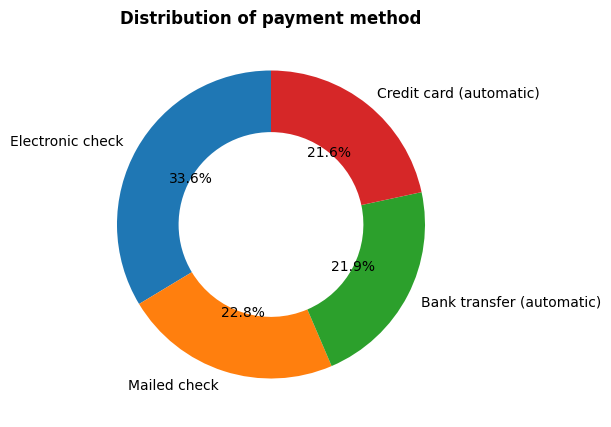

In [ ]:
p_method = df['PaymentMethod'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(p_method, labels=p_method.index,autopct='%1.1f%%',
        startangle=90,wedgeprops=dict(width=0.4))
plt.title("Distribution of payment method", fontweight='bold')
plt.show()

In [ ]:
# Create the histogram
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="Customer Payment Method by Churn")
# Adjust the layout
fig.update_layout(width=700, height=500, bargap=0.1)
# Show the plot
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method. Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
# Graph of internate service
fig = px.histogram(df, x='Churn', color='InternetService', barmode='group', title='InternetService vs Churn')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate. Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
fig = px.histogram(df, x='Churn', color='PaperlessBilling', barmode='group', title='PaperlessBilling vs Churn')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.box(x='Churn', y='MonthlyCharges', title='Tenure vs Churn',data_frame=df)
fig.update_layout(width=700, height=500)
fig.show()

In [ ]:
fig = px.box(x='Churn', y='TotalCharges', title='TotalCharges vs Churn',data_frame=df)
fig.update_layout(width=700, height=500)
fig.show()

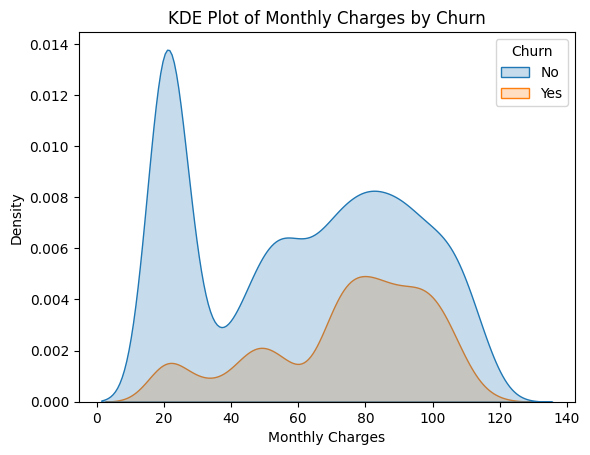

In [ ]:
# Create the KDE plot
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)

plt.title("KDE Plot of Monthly Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")

# Show the plot
plt.show()

* Customers with higher monthly charges (around 70-100) are more likely to churn.
* This suggests that higher billing may be a factor in customer churn.

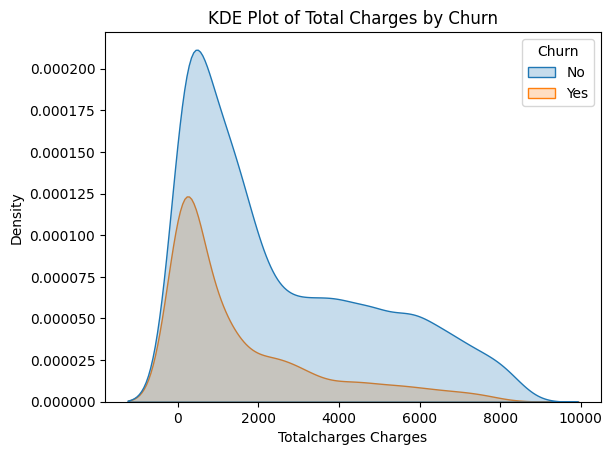

In [ ]:
# create a kde plot
sns.kdeplot(x='TotalCharges', hue='Churn',fill=True, data=df)
plt.title("KDE Plot of Total Charges by Churn")
plt.xlabel("Totalcharges Charges")
plt.ylabel("Density")
plt.show()

* Most customers who want churned had total charges below $2000.
* Customers who stayed had higher total charges, suggesting longer customer relationships.

In [ ]:
fig = px.box(df['TotalCharges'], title ='Boxplot of Total Charge')
fig.update_layout(width=700, height=500)
fig.show()

In [ ]:
# Drop customerID as it's not useful
df.drop('customerID', axis=1, inplace=True)

# convert Target to binary
df['Churn'] = df['Churn'].map({'Yes':1, 'No' :0})
# Encode categorical features
cat_col = df.select_dtypes(include='object').columns
#One hot key
df = pd.get_dummies(df, columns=cat_col, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


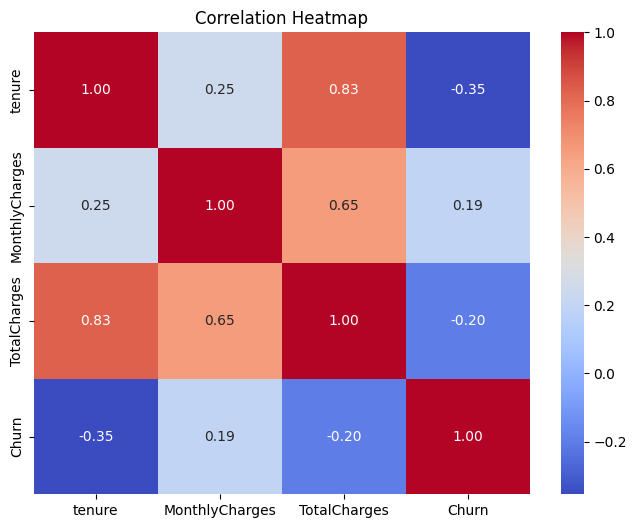

In [ ]:
# Select only numeric columns
num_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(),annot = True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
# Train test split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (5625, 30)
Test set size: (1407, 30)


####Logistic Regression

In [ ]:
# Model training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluation
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7867803837953091

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[915 118]
 [182 192]]


#### Random Forest model

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluation
rf_y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Accuracy: 0.7818052594171997

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
 [[924 109]
 [198 176]]


#### Decision Tree Model

In [ ]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)
# Evaluation
Dtree_y_pred = Dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, Dtree_y_pred))
print("\nClassification Report:\n", classification_report(y_test, Dtree_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, Dtree_y_pred))

Accuracy: 0.7256574271499645

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407


Confusion Matrix:
 [[827 206]
 [180 194]]


#### KNeighborsclassifier Model

In [ ]:
KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
# Evaluation
kn_y_pred = KN.predict(X_test)
print("Accuracy:", accuracy_score(y_test, kn_y_pred))
print("\nClassification Report:\n", classification_report(y_test, kn_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, kn_y_pred))

Accuracy: 0.7476901208244492

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407


Confusion Matrix:
 [[859 174]
 [181 193]]


#### Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
# Evaluation
svm_y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))

Accuracy: 0.7910447761194029

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[937  96]
 [198 176]]


####BaggingClassifier Model

In [ ]:
bag_cla = BaggingClassifier()
bag_cla.fit(X_train, y_train)
# Evaluation
bc_y_pred = bag_cla.predict(X_test)
print("Accuracy:", accuracy_score(y_test, bc_y_pred))
print("\nClassification Report:\n", classification_report(y_test, bc_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, bc_y_pred))

Accuracy: 0.775408670931059

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.61      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407


Confusion Matrix:
 [[929 104]
 [212 162]]


####AdaBoost Model

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
# Evaluation
ab_y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, ab_y_pred))
print("\nClassification Report:\n", classification_report(y_test, ab_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ab_y_pred))

Accuracy: 0.7938877043354655

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[933 100]
 [190 184]]


####Voting Classifier
Let's now predict the final model based on the highest majority of voting and check it's score.

In [ ]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC(probability=True)
model4 = DecisionTreeClassifier()
model5 = KNeighborsClassifier()
model6 = BaggingClassifier()
model7 = AdaBoostClassifier()
voting_model = VotingClassifier(estimators=[
    ('logreg', model1),('raf', model2), ('svc', model3), ('dtr', model4), ('knei_c',model5),
('bagg', model6), ('ada', model7)], voting='soft')
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7846481876332623


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



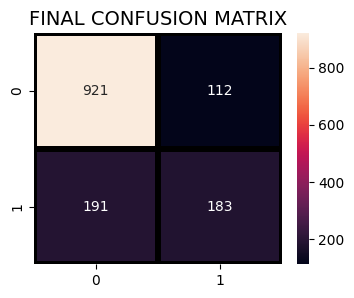

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

* From the confusion matrix we can see that: There are total 921+112=1033 actual non-churn values and the algorithm predicts 921 of them as non churn and 112 of them as churn. While there are 191+183=374 actual churn values and the algorithm predicts 191 of them as non churn values and 183 of them as churn values.

Top Features Contributing to Churn:
                           Feature  Importance
3                     TotalCharges    0.193409
2                   MonthlyCharges    0.169758
1                           tenure    0.167572
10     InternetService_Fiber optic    0.039999
28  PaymentMethod_Electronic check    0.035016
13              OnlineSecurity_Yes    0.028905
25               Contract_Two year    0.028618
4                      gender_Male    0.026971
19                 TechSupport_Yes    0.025829
26            PaperlessBilling_Yes    0.025044


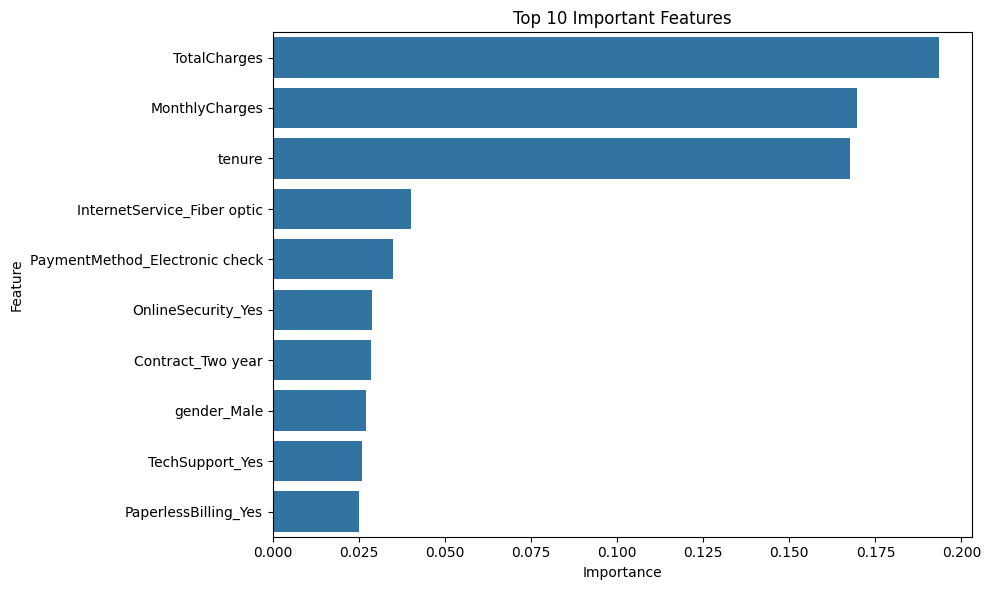

In [ ]:
# Train Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Create DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features Contributing to Churn:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

* TotalCharges, MonthlyCharges, and tenure — they are strong indicators of churn behavior.

####Predicting on New Data

In [ ]:
def get_churn_prediction(voting_model, training_columns):
    # Collecting user input
    SeniorCitizen = int(input("Senior Citizen (0 = No, 1 = Yes): "))
    tenure = int(input("Tenure (in months): "))
    MonthlyCharges = float(input("Monthly Charges: "))
    TotalCharges = float(input("Total Charges: "))
    gender_Male = int(input("Gender Male? (1 = Yes, 0 = No): "))
    Partner_Yes = int(input("Has Partner? (1 = Yes, 0 = No): "))
    Dependents_Yes = int(input("Has Dependents? (1 = Yes, 0 = No): "))
    PhoneService_Yes = int(input("Has Phone Service? (1 = Yes, 0 = No): "))
    MultipleLines_Yes = int(input("Has Multiple Lines? (1 = Yes, 0 = No): "))
    InternetService_Fiber_optic = int(input("Uses Fiber Optic Internet? (1 = Yes, 0 = No): "))
    OnlineSecurity_Yes = int(input("Has Online Security? (1 = Yes, 0 = No): "))
    OnlineBackup_Yes = int(input("Has Online Backup? (1 = Yes, 0 = No): "))
    DeviceProtection_Yes = int(input("Has Device Protection? (1 = Yes, 0 = No): "))
    TechSupport_Yes = int(input("Has Tech Support? (1 = Yes, 0 = No): "))
    StreamingTV_Yes = int(input("Uses Streaming TV? (1 = Yes, 0 = No): "))
    StreamingMovies_Yes = int(input("Uses Streaming Movies? (1 = Yes, 0 = No): "))
    Contract_Two_year = int(input("Two Year Contract? (1 = Yes, 0 = No): "))
    Contract_One_year = int(input("One Year Contract? (1 = Yes, 0 = No): "))
    PaperlessBilling_Yes = int(input("Uses Paperless Billing? (1 = Yes, 0 = No): "))
    PaymentMethod_Electronic_check = int(input("Pays via Electronic Check? (1 = Yes, 0 = No): "))

    # Create the input dictionary
    input_dict = {
        'SeniorCitizen': SeniorCitizen,
        'tenure': tenure,
        'MonthlyCharges': MonthlyCharges,
        'TotalCharges': TotalCharges,
        'gender_Male': gender_Male,
        'Partner_Yes': Partner_Yes,
        'Dependents_Yes': Dependents_Yes,
        'PhoneService_Yes': PhoneService_Yes,
        'MultipleLines_Yes': MultipleLines_Yes,
        'InternetService_Fiber optic': InternetService_Fiber_optic,
        'OnlineSecurity_Yes': OnlineSecurity_Yes,
        'OnlineBackup_Yes': OnlineBackup_Yes,
        'DeviceProtection_Yes': DeviceProtection_Yes,
        'TechSupport_Yes': TechSupport_Yes,
        'StreamingTV_Yes': StreamingTV_Yes,
        'StreamingMovies_Yes': StreamingMovies_Yes,
        'Contract_Two year': Contract_Two_year,
        'Contract_One year': Contract_One_year,
        'PaperlessBilling_Yes': PaperlessBilling_Yes,
        'PaymentMethod_Electronic check': PaymentMethod_Electronic_check
    }


    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Fill in any missing columns with 0
    for col in training_columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns
    input_df = input_df[training_columns]

    # Predict
    label = voting_model.predict(input_df)[0]
    prob = voting_model.predict_proba(input_df)[0][1]

    result = "CHURN" if label == 1 else "STAY"
    print(f"\nPrediction: Customer is likely to {result}")
    print(f"Churn Probability: {prob:.2%}")

In [ ]:
training_columns = list(X_train.columns)
get_churn_prediction(voting_model, training_columns)

Senior Citizen (0 = No, 1 = Yes): 1
Tenure (in months): 36
Monthly Charges: 1200
Total Charges: 8000
Gender Male? (1 = Yes, 0 = No): 1
Has Partner? (1 = Yes, 0 = No): 0
Has Dependents? (1 = Yes, 0 = No): 0
Has Phone Service? (1 = Yes, 0 = No): 1
Has Multiple Lines? (1 = Yes, 0 = No): 1
Uses Fiber Optic Internet? (1 = Yes, 0 = No): 1
Has Online Security? (1 = Yes, 0 = No): 1
Has Online Backup? (1 = Yes, 0 = No): 0
Has Device Protection? (1 = Yes, 0 = No): 1
Has Tech Support? (1 = Yes, 0 = No): 1
Uses Streaming TV? (1 = Yes, 0 = No): 0
Uses Streaming Movies? (1 = Yes, 0 = No): 1
Two Year Contract? (1 = Yes, 0 = No): 0
One Year Contract? (1 = Yes, 0 = No): 0
Uses Paperless Billing? (1 = Yes, 0 = No): 0
Pays via Electronic Check? (1 = Yes, 0 = No): 1

Prediction: Customer is likely to STAY
Churn Probability: 49.22%


### actionable insights to reduce customer churn.
Customer churn is bad for a company’s profits. To stop customers from leaving, businesses can use different strategies. The best way to prevent churn is to really understand their customers. This means finding out which customers might leave and working to make them happier. Good customer service is very important. Companies can also build loyalty by offering personalized and meaningful experiences. Some businesses ask customers who have already left why they did so, and use that feedback to stop others from leaving in the future.